In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000740942"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000740942
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,TOWER BANCORP INC
Ticker,TOBC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,18.0,2.623667e+01,5.278712e+00,21.18,2.226500e+01,23.11,3.111500e+01,34.78
interest income,15.0,2.337847e+07,2.053014e+07,8635000.00,1.403100e+07,17575000.00,2.604250e+07,92927000.00
net income,18.0,2.269713e+06,2.810474e+06,-4310000.00,7.030000e+05,1980500.00,3.866519e+06,7036594.00
net interest income,18.0,1.764464e+07,1.352500e+07,4320000.00,1.046900e+07,13879856.00,2.035091e+07,66588000.00
provision for loan losses,18.0,1.497500e+06,1.358850e+06,369000.00,6.500000e+05,1337500.00,1.575000e+06,5717000.00


# Plots

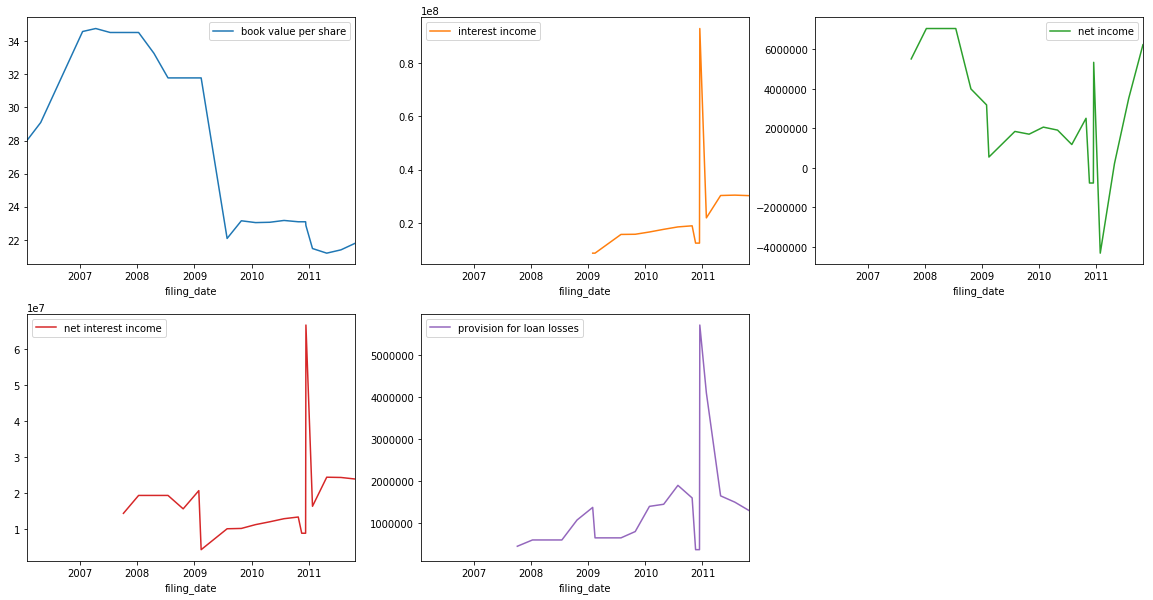

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000740942 book value per share        2006Q2 to 2006Q3: 2 periods    missing   
           book value per share        2007Q3 to 2007Q4: 2 periods    missing   
           book value per share        2008Q3 to 2009Q1: 3 periods    missing   
           interest income            2005Q4 to 2008Q3: 12 periods    missing   
           interest income                                  2009Q1    missing   
           interest income                                  2010Q3  duplicate   
           net income                  2005Q4 to 2007Q2: 7 periods    missing   
           net income                  2008Q1 to 2008Q2: 2 periods    missing   
           net income                                       2008Q4  duplicate   
           net income                                       2009Q1    missing   
           net income                                       2010Q3  duplicate   
           net interest income         2005Q4 to 2007Q2: 7 periods    missing   
           net interest income         2008Q1 to 2008Q2: 2 periods    missing   
           net interest income                              2008Q4  duplicate   
           net interest income                              2009Q1    missing   
           net interest income                              2010Q3  duplicate   
           provision for loan losses   2005Q4 to 2007Q2: 7 periods    missing   
           provision for loan losses   2008Q1 to 2008Q2: 2 periods    missing   
           provision for loan losses                        2008Q4  duplicate   
           provision for loan losses                        2009Q1    missing   
           provision for loan losses                        2010Q3  duplicate   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000740942 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income              Duplicate period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income          Duplicate period  
           net interest income            Missing period  
           net interest income          Duplicate period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()